In [10]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio  # Use v2 to avoid deprecation warning
from scipy.misc import imsave

In [25]:
imgpath = imageio.imread("C:/Users/nam/downloads//image1.jpg")

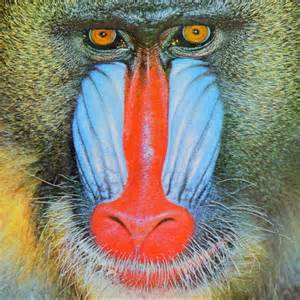

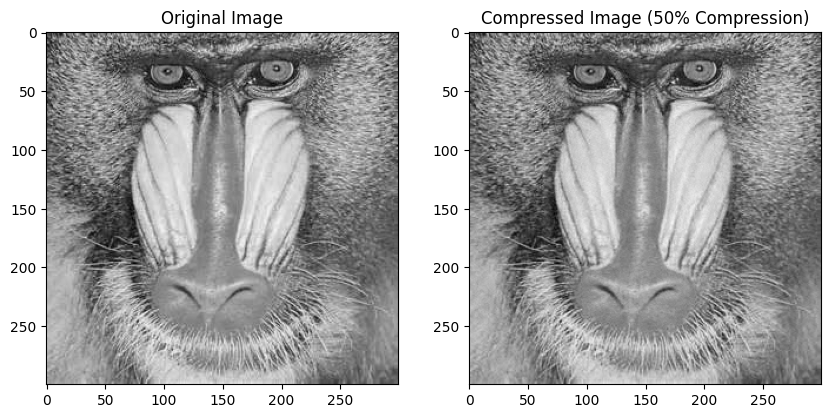

In [29]:
def compress_image(image_path, compression_ratio):
    """Compresses an image using SVD.

    Args:
        image_path: Path to the image file.
        compression_ratio: The desired compression ratio (0 to 1). 
                         Lower values mean more compression (and lower quality).

    Returns:
        The compressed image as a NumPy array, or None if an error occurs.
    """
    try:
        img = imageio.imread(image_path)
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return None

    # Convert to grayscale if it's a color image
    if len(img.shape) == 3:
        img = np.mean(img, axis=2)

    U, S, V = np.linalg.svd(img)

    # Keep only the top k singular values
    k = int(min(img.shape) * (1 - compression_ratio))  # Calculate number of components to keep
    S = np.diag(S[:k])
    U = U[:, :k]
    V = V[:k, :]

    compressed_img = np.dot(U, np.dot(S, V))
    return compressed_img

# Example usage:
image_path = "C:/Users/nam/downloads//image1.jpg" 
compression_ratio = 0.5  # Compress to 50% of the original size

compressed_image = compress_image(image_path, compression_ratio)

if compressed_image is not None:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    original_img = imageio.imread(image_path)
    if len(original_img.shape) == 3:
        original_img = np.mean(original_img, axis=2)
    plt.imshow(original_img, cmap='gray')
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f"Compressed Image ({int(compression_ratio*100)}% Compression)")

    plt.show()

In [ ]:
#References from https://github.com/luke-dinh/Unsupervised-Learning/blob/main/02-SVD/example.py